In [34]:
SEARCH_TERM = "Karnataka"
TWEETS_LIMIT = 300
TIME_LIMIT = 5
FILE_PATH = "/home/karthikeya/ProjectsSJSU/ML_Project/Data/"

 
consumer_key = 'HImrEBDPQ1v30Ms8yevMAtOc2'
consumer_secret = 'hwmtGELZmLXHAaV1Xok9lkUjNjB3n3fu8SMvnGJv1ofnfMKqd0'
access_token = '354844313-ITXlT4314nPV3WxXjEcgq5xlVecRgK2KItdTjkJV'
access_secret = 'rBvKgdyZaOgcMj5xULpTYZfWaLjlm4wH3qbcUSwJf65tq'


import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from IPython.display import display

from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import string
import json
import urllib
import re
from collections import Counter
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import style
from IPython.display import HTML, Image

%matplotlib inline
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [35]:
#tweets = api.search(q=SEARCH_TERM,count=100,rpp=TWEETS_COUNT, since='2018-01-01',until='2018-05-10',granularity="region",country="India", region="Karnataka", show_user=True)
#print("Number of tweets extracted: {}.\n".format(len(tweets)))

class MyListner(StreamListener):
    '''
    def __init__(self,SEARCH_TERM,TWEETS_COUNT):
        self.TWEETS_COUNT=TWEETS_COUNT
        self.SEARCH_TERM=SEARCH_TERM
    '''
    def __init__(self, TWEETS_LIMIT=50):
        self.count = 0
        self.TWEETS_LIMIT =TWEETS_LIMIT
    
    def on_data(self,data):
      # removes if a file already exists with same name and creates new file and writes into that

        try:
            all_data = json.loads(data)
            tweet = all_data["text"]
            textblb = TextBlob(tweet).sentiment
            print(textblb.polarity,textblb.subjectivity)
            print(self.count)
            print(len(tweet))
            
            with open(FILE_PATH + SEARCH_TERM+'.json', 'a+') as f:
                f.write(data)
                self.count+=1
                if textblb.subjectivity*100 >= 50:
                    output = open(FILE_PATH + SEARCH_TERM+".txt",'a+')
                    output.write(str(textblb.polarity))
                    output.write('\n')
                    output.close()
                    return False if self.count == TWEETS_LIMIT else True

        except BaseException as e:
            print("Error on data: %s" %str(e))
        return True
    
    def on_error(self,status):
        print(status)
        return True


twitter_stream = Stream(auth,MyListner(TWEETS_LIMIT)) #calling stream function to stream in live data
#print(twitter_stream)
twitter_stream.filter(track=[SEARCH_TERM])



#def Sentiment_Analysis(text):
#    encoded_text = urllib.parse(text)

'''
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
print(dir(tweets[0]))
print(data)

'''

0.04166666666666667 0.25
0
112
0.3333333333333333 0.43333333333333335
1
140
0.4375 0.30000000000000004
2
140
0.0 0.0
3
140
0.0 1.0
4
140
0.6 0.9
5
139
1.0 0.3
6
140
0.0 0.0
7
119
0.0 0.0
8
144
0.0 0.06666666666666667
9
144
0.5 0.7
10
140
0.3333333333333333 0.6666666666666666
11
140
0.0 0.0
12
139
0.0 0.0
13
140
0.24666666666666667 0.8166666666666668
14
143
0.0 0.0
15
139
0.0 0.0
16
119
0.0 0.125
17
140
0.0 0.0
18
107
0.0 0.0
19
143
-0.5 1.0
20
140
0.0 0.0
21
107
0.0 0.2575
22
140
0.0 0.6
23
140
0.0 0.0
24
127
0.0029761904761904795 0.2976190476190476
25
140
0.0 0.0
26
119
0.3333333333333333 0.5833333333333334
27
140
0.35 0.33333333333333337
28
140
0.0 0.5
29
140


"\n# We create a pandas dataframe as follows:\ndata = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])\nprint(dir(tweets[0]))\nprint(data)\n\n"

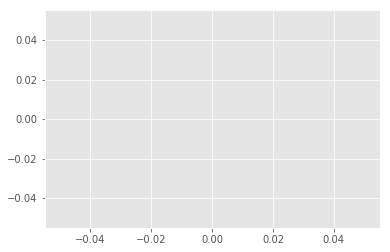

In [36]:
rc('animation', html='html5')
fig, ax = plt.subplots()
plt.rcParams["animation.html"] = "jshtml"
li, = ax.plot([], [], lw=2)


def animate(i):
    pulldata = open(FILE_PATH + SEARCH_TERM+".txt",'r').read()
    lines = pulldata.split('\n')
    
    xar = []
    yar = []
    
    x = 0
    y = 0
    
    for l in lines[-200:-1]:
        x+=1
        if l!=' ':            
            a = float(l)
            y += a
            
            xar.append(x)
            yar.append(y)
 
    li.set_data(x,y)
    return (li,)
ani = animation.FuncAnimation(fig, animate, interval=100,frames=len(x))
ani.save('/images/animation.gif', writer='imagemagick', fps=60)
Image(url='/images/animation.gif')




[('karnataka', 1985), ('vote', 909), ('congress', 485), ('today', 363), ('voting', 358), ('people', 337), ('dear', 190), ('govt', 160), ('development', 158), ('voters', 140), ('progress', 140), ('please', 124), ('like', 120), ('modi', 120), ('democracy', 114), ('party', 114), ('numbers', 113), ('election', 112), ('take', 111), ('young', 110), ('kannadigas', 108), ('large', 106), ('time', 101), ('government', 99), ('brothers', 98), ('would', 94), ('right', 93), ('particularly', 93), ('sisters', 90), ('urging', 88), ('politics', 88), ('defeats', 88), ('welfare', 86), ('good', 85), ('upon', 85), ('call', 84), ('voice', 78), ('elections', 78), ('forget', 77), ('nava', 77), ('made', 75), ('road', 74), ('communal', 73), ('living', 72), ('state', 72), ('along', 72), ('schemes', 71), ('appeal', 69), ('initiated', 69), ('free', 66)]
[('karnataka', 1985), ('vote', 909), ('congress', 485), ('today', 363), ('voting', 358), ('people', 337), ('dear', 190), ('govt', 160), ('development', 158), ('vote

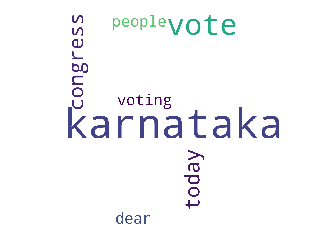

In [37]:

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation +['rt','RT', 'via','ó','ल','ु','்','ज','I','ब','य','द','ै','ट','भ','ग','प','व','ி','श','amp','https','ू','।','ध','ு','च','1','ा','https://t.co/ztrgtkfhbe','https://t.co/3hoedyc3zf','https://t.co/o2c1u5cdii'] 
fname = FILE_PATH + SEARCH_TERM+".json"

with open(fname, 'r',newline='\r\n') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_stop)
        # Count hashtags only
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
              # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text'].lower()) 
                      if term not in stop  and not term.startswith(( '@', '#')) ] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
        
        terms_all = [term for term in preprocess(tweet['text'])]
        #print (terms_all)
        new_terms = []
        for term in terms_only:
            if len(term) > 3:
                new_terms.append(term)            
            
        # Update the counter
        count_all.update(new_terms)
        #count_all.update(terms_only)
    # Print the first 5 most frequent words
    print(count_all.most_common(50))


data = count_all.most_common(50)
print(data)
df = pd.DataFrame(data)
df.columns = ('terms','frec')
print(df.head())
#df.to_csv('word_freq.csv')
word_string = ''
for index, row in df.iterrows():
    #print ((row['terms'] + ' ')*row['frec'])
    word_string += (row['terms'] + ' ')*int(row['frec']/180)
    
#print (word_string)   
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()



       terms  freq
0  karnataka    21
1       vote     6
2   congress     4
3   election     4
4      dirty     2


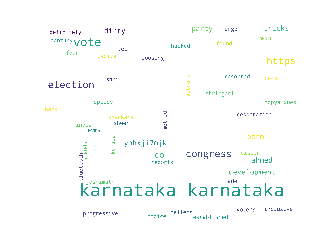

In [51]:

class MyListner(StreamListener):
    def __init__(self, TWEETS_LIMIT=50):
        self.count = 0
        self.TWEETS_LIMIT =TWEETS_LIMIT
        global new_terms

    def on_data(self,data):
        try:
            #print(len(new_terms))
            all_data = json.loads(data)
            tweet = all_data["text"]
            textblb = TextBlob(tweet).sentiment
            #print(textblb.polarity,textblb.subjectivity)
            terms_stop = [term for term in preprocess(tweet) if term not in stop]
            terms_single = set(terms_stop)
            terms_hash = [term for term in preprocess(tweet) if term.startswith('#')]
            terms_only = [term for term in preprocess(tweet.lower())
                      if term not in stop and not term.startswith(( '@', '#')) ]
            terms_all = [term for term in preprocess(tweet)]
            
            for term in terms_only:
                if len(term) > 3:
                    new_terms.append(term)            
            self.count+=1
            return False if self.count == TWEETS_LIMIT else True
            
            if textblb.subjectivity*100 >= 70:
                output = open(FILE_PATH + SEARCH_TERM+".txt",'a')
                output.write(str(textblb.polarity))
                output.write('\n')
                output.close()
                return True
  
        except BaseException as e:
            print("Error on data: %s" %str(e))
        return True
    
    def on_error(self,status):
        print(status)
        return True

count_all = Counter()
new_terms = []


twitter_stream = Stream(auth,MyListner(TWEETS_LIMIT)) #calling stream function to stream in live data
twitter_stream.filter(track=[SEARCH_TERM])

count_all.update(new_terms)
#print(count_all.most_common(50))
data = count_all.most_common(50)
df= pd.DataFrame(data)
df.columns = ('terms','freq')
#print(df)
print(df.head())
word_string = ""
for index, row in df.iterrows():
    word_string += str((row['terms'] + ' ')*int(row['freq']))
    #print((row['terms'] + ' ')*int(row['freq']/180))
    
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          mode ='RGB',
                          width=3600,
                          height=3000
                         ).generate(word_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



